In [73]:
import numpy as np
import sympy as sp
from sympy.utilities import lambdify

sp.init_printing()

In [74]:
x = sp.Symbol("x", real = True)
k = sp.Symbol("k", real = True, positive = True)
a = sp.Symbol("a", real = True)
n = sp.Symbol("n", integer = True, nonzero = True)
h = sp.Symbol("hbar", real = True, positive = True)
i = sp.I
psi = sp.Function("\psi")

x, k, a, n, h, psi(x)

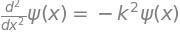

In [75]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [76]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol = sol.subs(k, n * sp.pi / a)
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2/a))
sol

In [77]:
x1 = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
x1

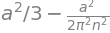

In [78]:
x2 = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
x2

ZADANIE 1: ŚREDNI PĘD

Operator pędu: $$\hat{p} = -i\hbar\frac{\partial}{\partial x}$$
 
$$< p > = \int_{-\infty}^{\infty} \Psi^{\ast}\hat{p}\Psi dx = \int_{0}^{a} \Psi(-i\hbar\frac{\partial\Psi}{\partial x}) dx$$

In [79]:
p1 = sp.integrate(sol.rhs * -i * h * sol.rhs.diff(x), (x, 0, a)).simplify()
p1

ZADANIE 2: ŚREDNI KWADRAT PĘDU

$$< p^2 > = \int_{-\infty}^{\infty} \Psi^{\ast}\hat{p}^2\Psi dx = \int_{0}^{a} \Psi(-\hbar^2\frac{\partial^2\Psi}{\partial x^2}) dx$$

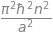

In [80]:
p2 = sp.integrate(sol.rhs * (-i*h)**2 * sol.rhs.diff(x, x), (x, 0, a)).simplify()
p2

ZADANIE 3: CZY JEST SPEŁNIONA ZASADA NIEOZNACZONOŚCI?

Zasada nieoznaczoności mówi, że nie możemy dobrze określić jednocześnie położenie i pęd cząstki

$$\sigma_{x}\sigma_{p} \ge \frac{\hbar}{2}$$

Żeby to sprawdzić. należy obliczyć odchylenia standardowe położenia oraz pędu:
$$\sigma_{x} = \sqrt{VarX} = \sqrt{\mathbb{E}X^2 - (\mathbb{E}X)^2} = \sqrt{<x^2> - (<x>)^2}$$
$$\sigma_{p} = \sqrt{VarP} = \sqrt{\mathbb{E}P^2 - (\mathbb{E}P)^2} = \sqrt{<p^2> - (<p>)^2}$$

In [81]:
sigmax = sp.sqrt(x2-x1**2).simplify()
sigmax

In [82]:
sigmap = sp.sqrt(p2-p1**2).simplify()
sigmap

Dostajemy w wyniku:

In [83]:
(sigmax*sigmap).simplify() >= h/2

Żeby sprawdzić prawdziwość tej nierówności, musimy rozważyć wartości lewej strony w zależności od wartości $n$.

Najpierw skróćmy $\frac{\hbar}{2}$ po obu stronach nierówności: $$\frac{\sqrt{3\pi^2n^2-18}}{3} \ge 1$$

Dalej możemy zauważyć, że funkcja po lewej stronie jest rosnąca, więc jeżeli dla $n=1$ będzie spełniona ta nierówność, to również będzie ona spełniona dla $n = 2, 3, ...$

In [84]:
n = 1
h1 = sp.sqrt(3*(np.pi**2)*(n**2)-18)/3
h1

In [85]:
h1 > 1

True

Stąd wnioskujemy o spełnieniu zasady nieoznaczoności.